In [1]:
#Foi só para provar um ponto no word
n = 78
for i in range( n - 1, 0, -1):n = n * i
print(n)

11324281178206297831457521158732046228731749579488251990048962825668835325234200766245086213177344000000000000000000


In [2]:
nome_lanel  = []
input_label = []
output_label = []
a,b = 0,0
ficheiro = open("..\\Dataset\\02-03-2018.csv", "r")
nome_label = ficheiro.readline().split(",")
ficheiro.readline()
ficheiro.readline()
linha = ficheiro.readline()
while(linha != ""):
    linha = linha.split(",")
    out = linha.pop(37)
    if(out == "Benign"): 
        out = 0
        b += 1
    else: 
        out = 1
        a += 1
    output_label.append(out)
    input_label.append(linha)
    linha = ficheiro.readline()
ficheiro.close()
print(str(a) + " " + str(b))

286191 758334


In [3]:
backup_input_label = input_label[:]
backup_output_label = output_label[:]

In [16]:
input_label = backup_input_label[:]
output_label = backup_output_label[:]

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from random import randint

In [5]:
np.array(input_label).shape

(1044525, 78)

Dst Port 0


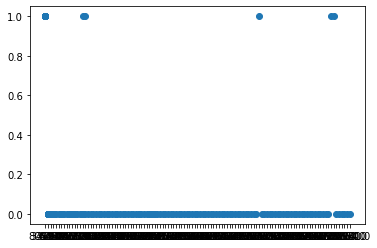

Fwd PSH Flags 1


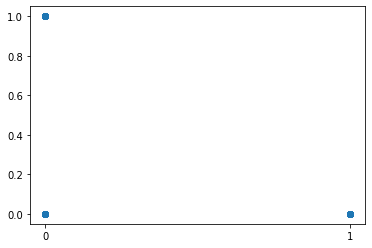

Protocol 2


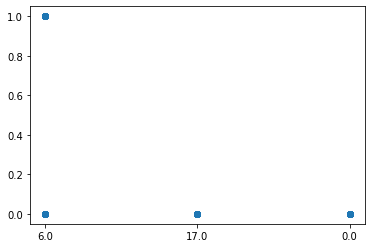

Bwd PSH Flags 3


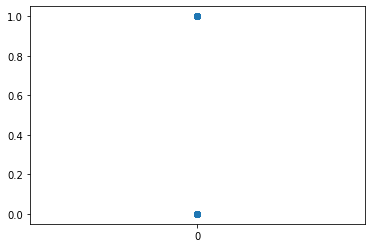

Flow Duration 4


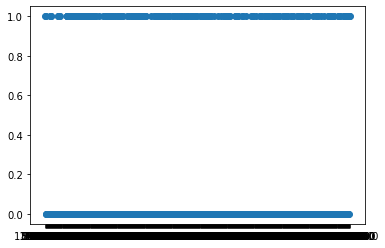

Fwd URG Flags 5


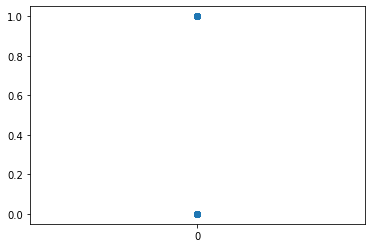

Tot Fwd Pkts 6


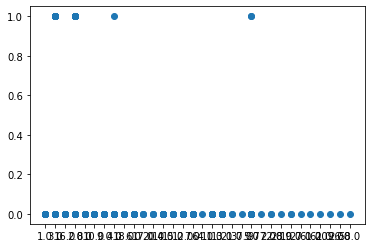

Bwd URG Flags 7


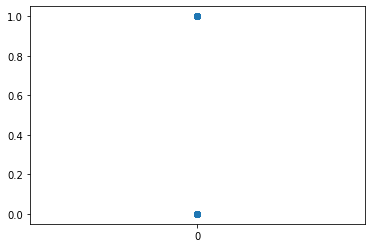

Tot Bwd Pkts 8


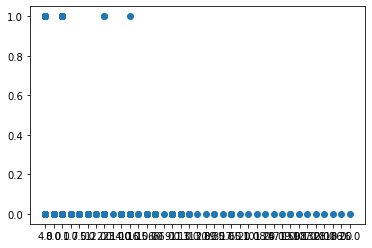

FIN Flag Cnt 9


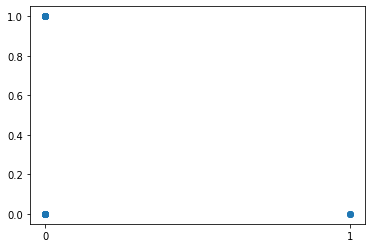

TotLen Fwd Pkts 10


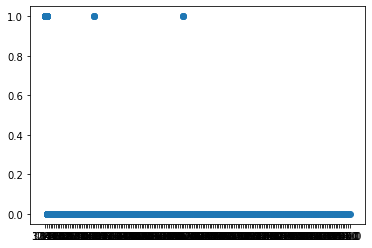

SYN Flag Cnt 11


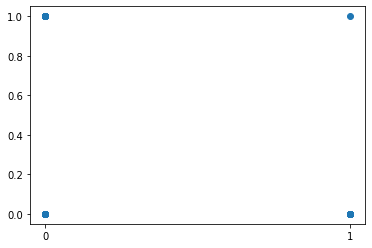

TotLen Bwd Pkts 12


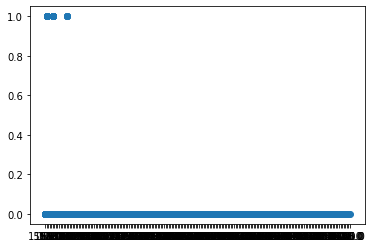

RST Flag Cnt 13


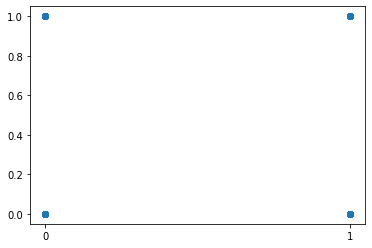

Fwd Pkt Len Max 14


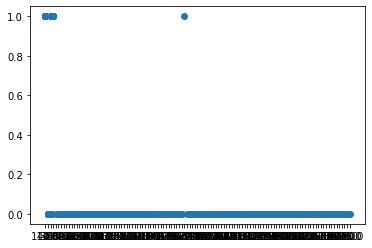

PSH Flag Cnt 15


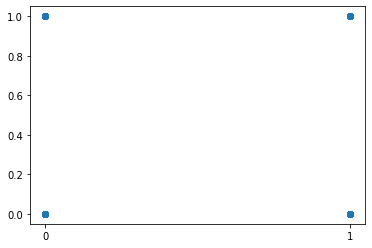

Fwd Pkt Len Min 16


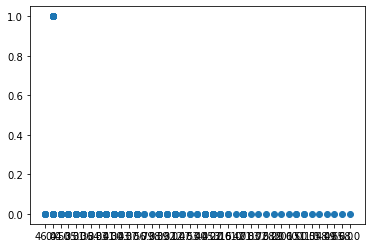

ACK Flag Cnt 17


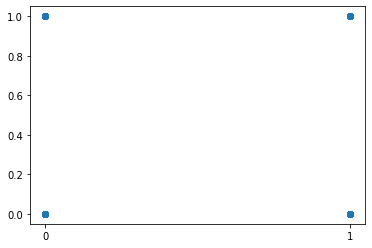

Fwd Pkt Len Mean 18


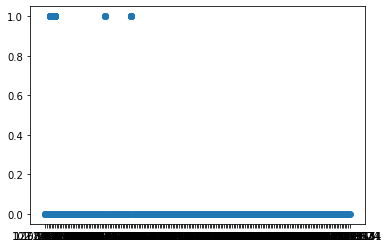

URG Flag Cnt 19


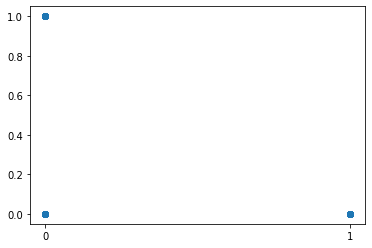

Fwd Pkt Len Std 20


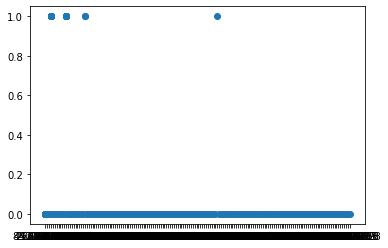

CWE Flag Count 21


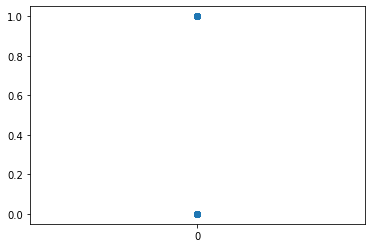

Bwd Pkt Len Max 22


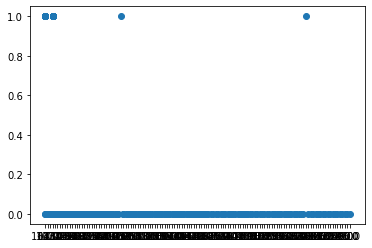

ECE Flag Cnt 23


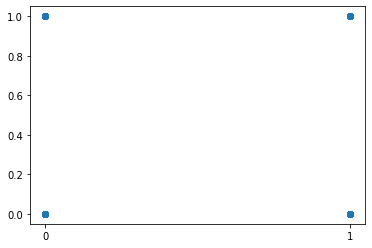

Bwd Pkt Len Min 24


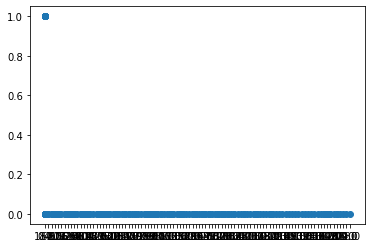

Fwd Byts/b Avg 25


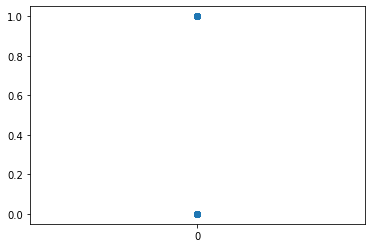

Bwd Pkt Len Mean 26


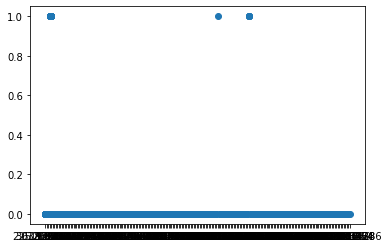

Fwd Pkts/b Avg 27


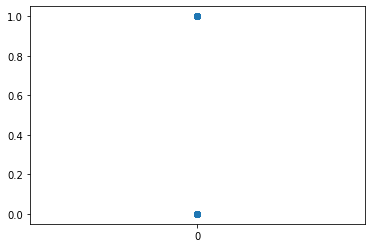

Bwd Pkt Len Std 28


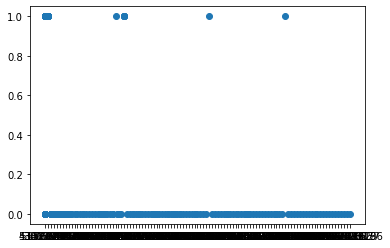

Fwd Blk Rate Avg 29


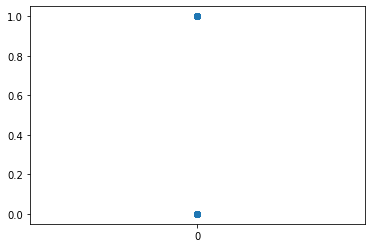

Flow Byts/s 30


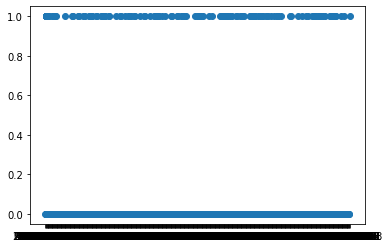

Bwd Byts/b Avg 31


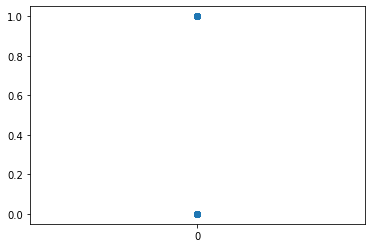

Flow Pkts/s 32


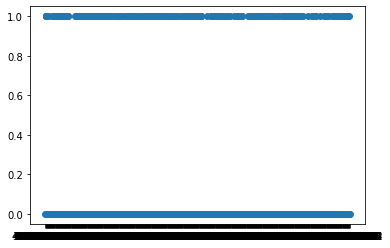

Bwd Pkts/b Avg 33


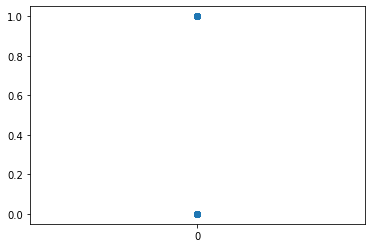

Flow IAT Mean 34


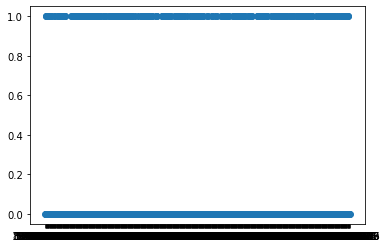

Bwd Blk Rate Avg 35


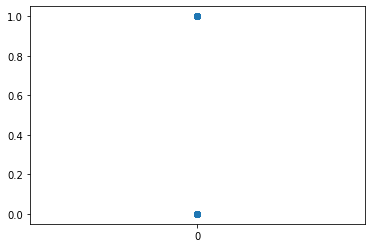

Flow IAT Std 36


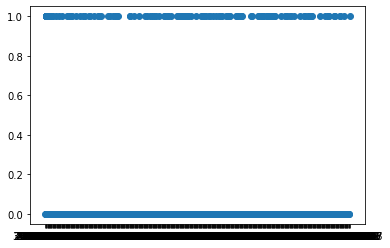

Label 37


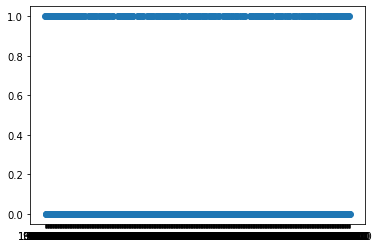

Flow IAT Max 38


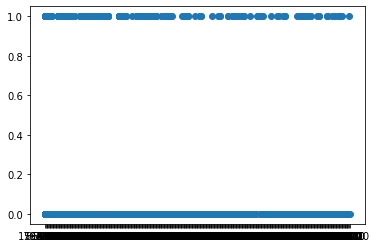

Flow IAT Min 39


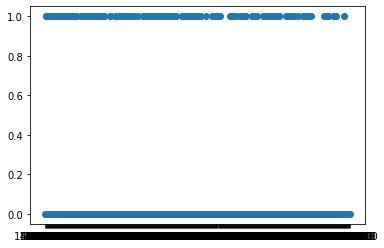

Fwd IAT Tot 40


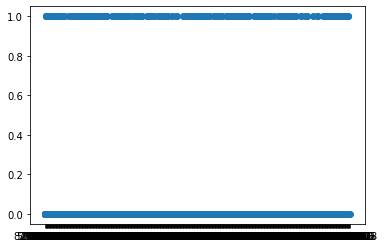

Fwd IAT Mean 41


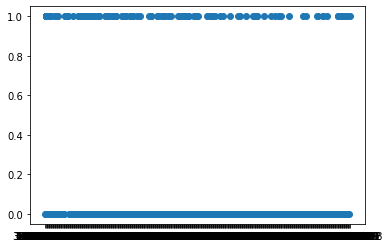

Fwd IAT Std 42


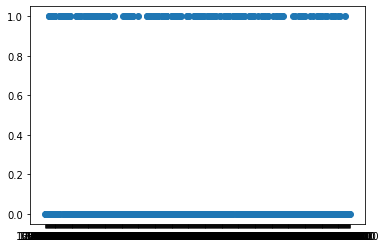

Fwd IAT Max 43


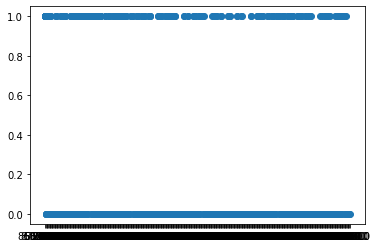

Fwd IAT Min 44


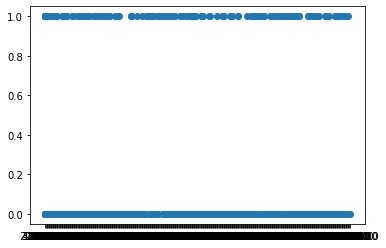

Bwd IAT Tot 45


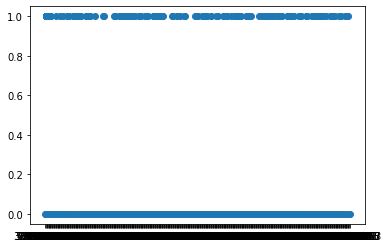

Bwd IAT Mean 46


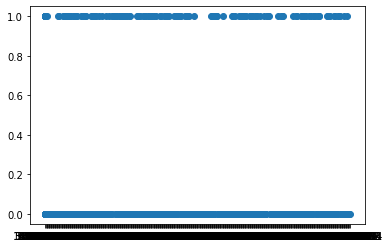

Bwd IAT Std 47


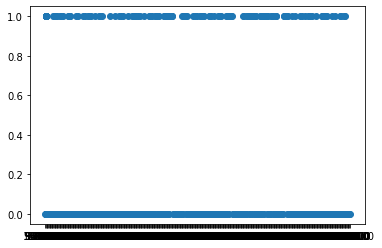

Bwd IAT Max 48


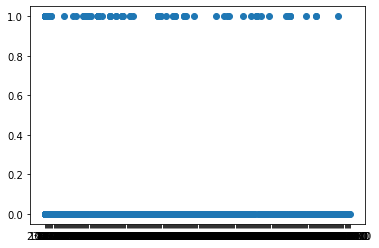

Bwd IAT Min 49


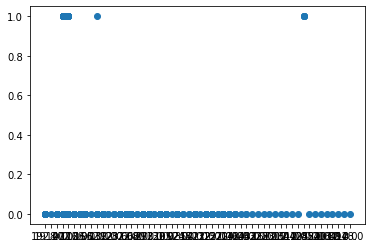

Fwd Header Len 50


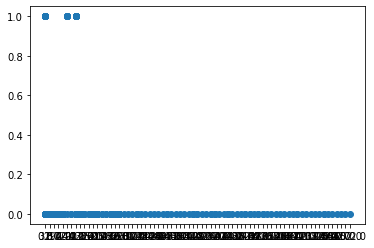

Bwd Header Len 51


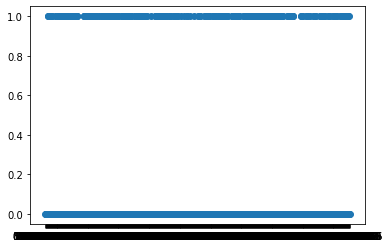

Fwd Pkts/s 52


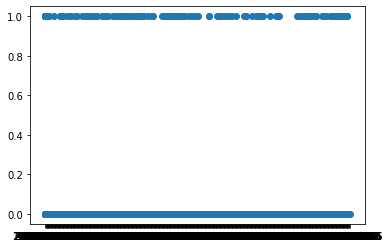

Bwd Pkts/s 53


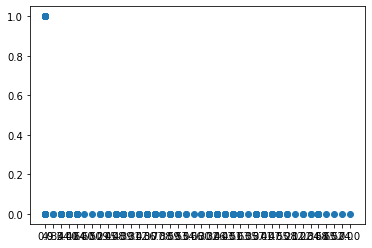

Pkt Len Min 54


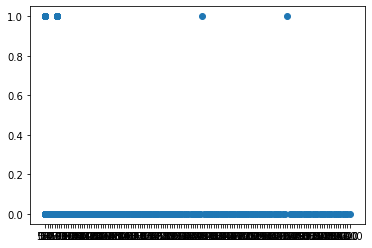

Pkt Len Max 55


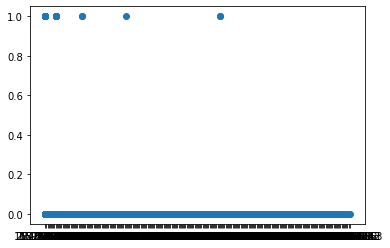

Pkt Len Mean 56


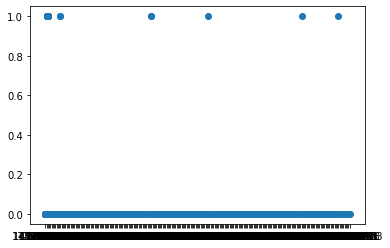

Pkt Len Std 57


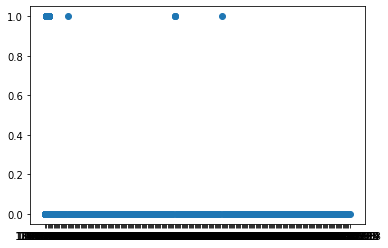

Pkt Len Var 58


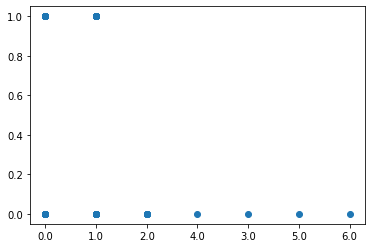

Down/Up Ratio 59


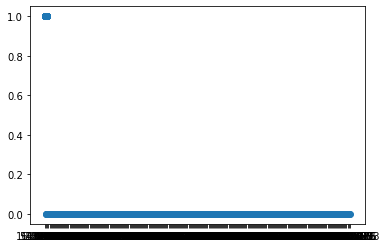

Pkt Size Avg 60


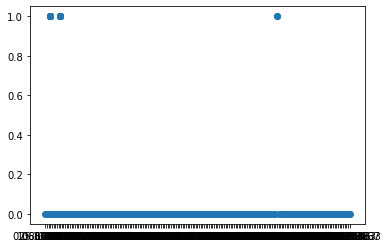

Fwd Seg Size Avg 61


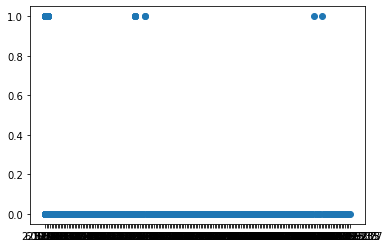

Bwd Seg Size Avg 62


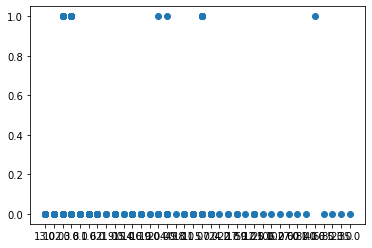

Subflow Fwd Pkts 63


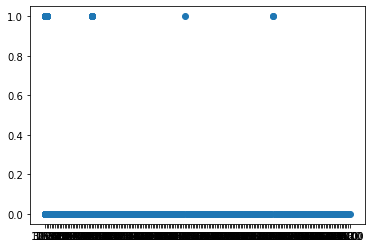

Subflow Fwd Byts 64


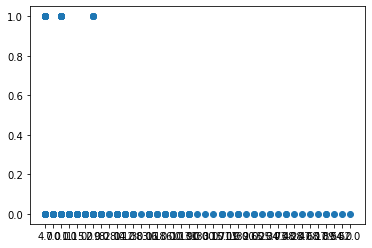

Subflow Bwd Pkts 65


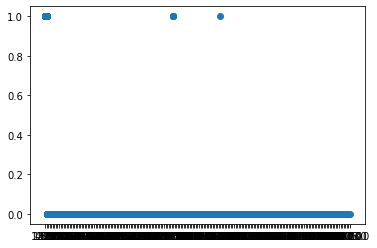

Subflow Bwd Byts 66


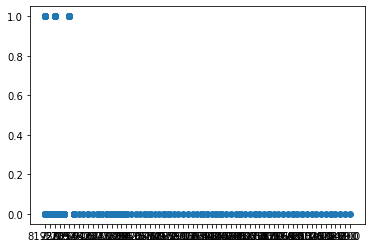

Init Fwd Win Byts 67


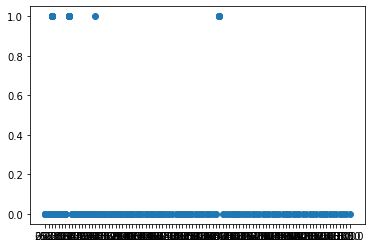

Init Bwd Win Byts 68


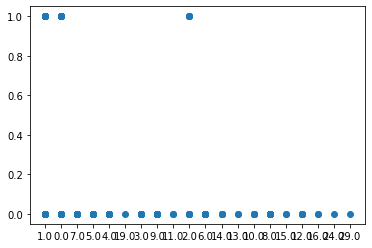

Fwd Act Data Pkts 69


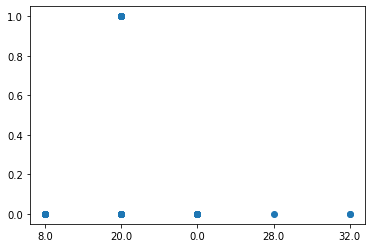

Fwd Seg Size Min 70


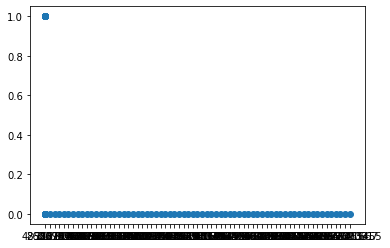

Active Mean 71


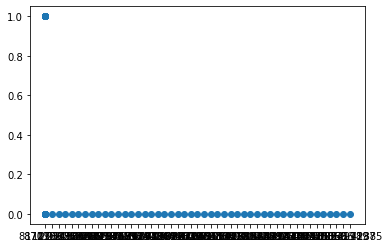

Active Std 72


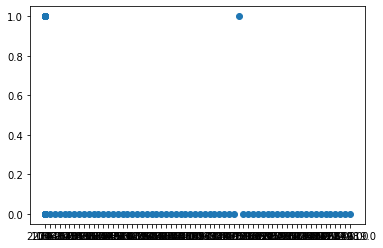

Active Max 73


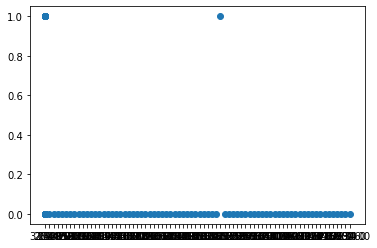

Active Min 74


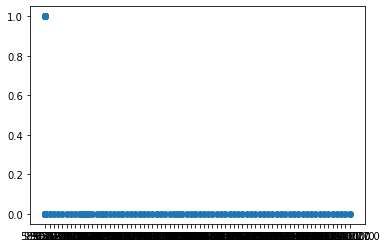

Idle Mean 75


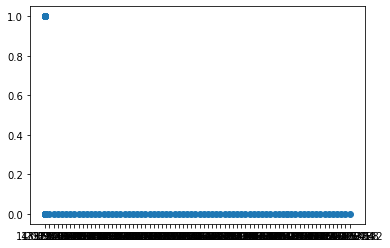

Idle Std 76


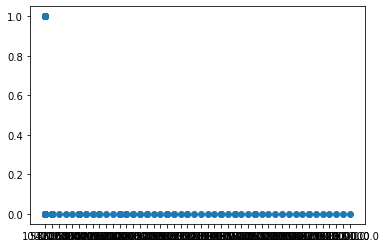

Idle Max 77


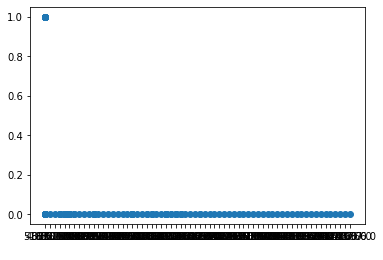

In [5]:
for i in range(78):
    x = []
    y = []
    for k in range(1000):
        num = randint(1, len(input_label) - 5)
        x.append(input_label[num][i])
        y.append(output_label[num])
    print(str(nome_label[i]) + " " + str(i))
    plt.scatter(x, y)
    plt.show()

In [7]:
import os
import tensorflow as tf
import numpy as np
import itertools
import matplotlib.pyplot as plt
import gc
from datetime import datetime
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import confusion_matrix

In [ ]:
#Primeiras Variaveis-----------------------------------------------------------------------------------------------------

In [6]:
variaveis_remover = [35,33,31,29,27,25,21,7,5,3]

In [7]:
for inp in input_label:
    for i in variaveis_remover: inp.pop(i)

In [8]:
print(len(input_label[0]))

68


In [10]:
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(input_label)
input_label = scaler.transform(input_label)

In [11]:
input_label = np.array(input_label).reshape(len(input_label), 68, 1)
output_label = np.array(output_label)

In [12]:
input_label, output_label = shuffle(input_label, output_label)

In [13]:
inp_train, inp_test, out_train, out_test = train_test_split(input_label, output_label, test_size = 0.2)

In [14]:
model = keras.Sequential([
    layers.Conv1D(filters = 128, kernel_size = 3, input_shape = (68,1), padding = "same", activation = "relu", use_bias = True), 
    layers.MaxPool1D(),
    layers.Conv1D(filters = 64, kernel_size = 3, padding = "same", activation = "relu", use_bias = True),
    layers.MaxPool1D(),
    layers.Conv1D(filters = 32, kernel_size = 3, padding = "same", activation = "relu", use_bias = True),
    layers.MaxPool1D(),
    layers.Flatten(),
    layers.Dense(units = 2, activation = "softmax")
])

In [15]:
model.compile(optimizer= keras.optimizers.SGD(learning_rate= 0.08), loss="sparse_categorical_crossentropy", metrics=['accuracy'])

In [16]:
treino = model.fit(x = inp_train, y = out_train, validation_split= 0.1, epochs = 10, shuffle = True,verbose = 1)

Epoch 1/10
23502/23502 [==============================] - 145s 6ms/step - loss: 0.0494 - accuracy: 0.9801 - val_loss: 0.0039 - val_accuracy: 0.9989
Epoch 2/10
23502/23502 [==============================] - 138s 6ms/step - loss: 0.0040 - accuracy: 0.9990 - val_loss: 0.0032 - val_accuracy: 0.9993
Epoch 3/10
23502/23502 [==============================] - 141s 6ms/step - loss: 0.0032 - accuracy: 0.9992 - val_loss: 0.0022 - val_accuracy: 0.9993
Epoch 4/10
23502/23502 [==============================] - 140s 6ms/step - loss: 0.0027 - accuracy: 0.9993 - val_loss: 0.0019 - val_accuracy: 0.9995
Epoch 5/10
23502/23502 [==============================] - 139s 6ms/step - loss: 0.0025 - accuracy: 0.9993 - val_loss: 0.0017 - val_accuracy: 0.9994
Epoch 6/10
23502/23502 [==============================] - 138s 6ms/step - loss: 0.0019 - accuracy: 0.9995 - val_loss: 0.0046 - val_accuracy: 0.9992
Epoch 7/10
23502/23502 [==============================] - 139s 6ms/step - loss: 0.0017 - accuracy: 0.9996 - val_

In [17]:
res = [np.argmax(resu) for resu in model.predict(inp_test)]

In [18]:
cm = confusion_matrix(y_true = out_test.reshape(len(out_test)), y_pred = np.array(res))

In [19]:
def plot_confusion_matrix(cm, classes, normaliza = False, title = "Confusion matrix", cmap = plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normaliza:
        cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix, without normalization")
    
    print(cm)
    
    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
        horizontalalignment="center",
        color="white" if cm[i,j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[151714     47]
 [    14  57130]]


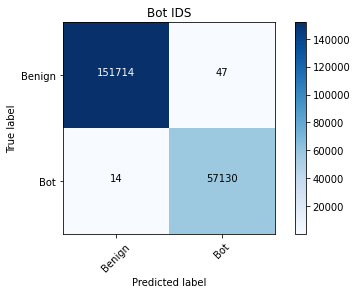

In [20]:
labels = ["Benign", "Bot"]
plot_confusion_matrix(cm = cm, classes = labels, title = "Bot IDS")

In [21]:
model.save("CNN1BotNet(02-03-2018)RV1.h5")

In [6]:
#Segundas Variaveis-----------------------------------------------------------------------------------------------------

In [8]:
variaveis_remover = [52,51,47,46,45,44,43,42,41,40,39,38,37,36,35,34,33,32,31,30,29,27,25,23,21,17,15,13,11,7,5,4,3]

In [9]:
for inp in input_label:
    for i in variaveis_remover: inp.pop(i)

In [10]:
print(len(input_label[0]))

45


In [11]:
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(input_label)
input_label = scaler.transform(input_label)

In [12]:
input_label = np.array(input_label).reshape(len(input_label), 45, 1)
output_label = np.array(output_label)

In [13]:
input_label, output_label = shuffle(input_label, output_label)

In [14]:
inp_train, inp_test, out_train, out_test = train_test_split(input_label, output_label, test_size = 0.2)

In [15]:
model = keras.Sequential([
    layers.Conv1D(filters = 128, kernel_size = 3, input_shape = (45,1), padding = "same", activation = "relu", use_bias = True), 
    layers.MaxPool1D(),
    layers.Conv1D(filters = 64, kernel_size = 3, padding = "same", activation = "relu", use_bias = True),
    layers.MaxPool1D(),
    layers.Conv1D(filters = 32, kernel_size = 3, padding = "same", activation = "relu", use_bias = True),
    layers.MaxPool1D(),
    layers.Flatten(),
    layers.Dense(units = 2, activation = "softmax")
])

In [16]:
model.compile(optimizer= keras.optimizers.SGD(learning_rate= 0.08), loss="sparse_categorical_crossentropy", metrics=['accuracy'])

In [17]:
treino = model.fit(x = inp_train, y = out_train, validation_split= 0.1, epochs = 10, shuffle = True,verbose = 1)

Epoch 1/10
23502/23502 [==============================] - 105s 4ms/step - loss: 0.0557 - accuracy: 0.9769 - val_loss: 0.0059 - val_accuracy: 0.9990
Epoch 2/10
23502/23502 [==============================] - 103s 4ms/step - loss: 0.0050 - accuracy: 0.9989 - val_loss: 0.0045 - val_accuracy: 0.9989
Epoch 3/10
23502/23502 [==============================] - 97s 4ms/step - loss: 0.0039 - accuracy: 0.9991 - val_loss: 0.0031 - val_accuracy: 0.9992
Epoch 4/10
23502/23502 [==============================] - 103s 4ms/step - loss: 0.0033 - accuracy: 0.9991 - val_loss: 0.0026 - val_accuracy: 0.9993
Epoch 5/10
23502/23502 [==============================] - 98s 4ms/step - loss: 0.0030 - accuracy: 0.9992 - val_loss: 0.0024 - val_accuracy: 0.9993
Epoch 6/10
23502/23502 [==============================] - 104s 4ms/step - loss: 0.0023 - accuracy: 0.9994 - val_loss: 0.0022 - val_accuracy: 0.9994
Epoch 7/10
23502/23502 [==============================] - 101s 4ms/step - loss: 0.0024 - accuracy: 0.9993 - val_lo

In [18]:
res = [np.argmax(resu) for resu in model.predict(inp_test)]

In [19]:
cm = confusion_matrix(y_true = out_test.reshape(len(out_test)), y_pred = np.array(res))

In [20]:
def plot_confusion_matrix(cm, classes, normaliza = False, title = "Confusion matrix", cmap = plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normaliza:
        cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix, without normalization")
    
    print(cm)
    
    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
        horizontalalignment="center",
        color="white" if cm[i,j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[151439     92]
 [    22  57352]]


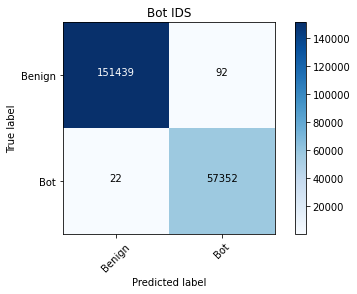

In [21]:
labels = ["Benign", "Bot"]
plot_confusion_matrix(cm = cm, classes = labels, title = "Bot IDS")

In [22]:
model.save("CNN1BotNet(02-03-2018)RV2.h5")